# DUC Datathon 2020
## Predicting Total Vertical Depth

In this section of the competition we are tasked with building regression machine learning (or other)
model that will be able to predict TVD (True Vertical Depth)

In [76]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data import

In [10]:
# import well header data
well_header = pd.read_csv("../data/WellHeader_Datathon.csv")

In [13]:
well_header.shape

(10437, 89)

In [14]:
well_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 89 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EPAssetsId                 10437 non-null  int64  
 1   Province                   10437 non-null  object 
 2   LicenceNumber              10437 non-null  object 
 3   UWI                        10437 non-null  object 
 4   CurrentOperator            10437 non-null  object 
 5   CurrentOperatorParent      10437 non-null  int64  
 6   CurrentOperatorParentName  10437 non-null  object 
 7   Licensee                   10437 non-null  object 
 8   LicenseeParentCompany      10437 non-null  int64  
 9   LicenseeParentCompanyName  10437 non-null  object 
 10  LicenceDate                10437 non-null  object 
 11  CurrentStatus              10437 non-null  object 
 12  CurrentStatusStandardised  10437 non-null  object 
 13  WellType                   10437 non-null  obj

Take a random sample with selected columns

In [102]:
well_header[['EPAssetsId','TVD','TotalDepth','Formation','BH_Location','Field']].sample(20)

,EPAssetsId,TVD,TotalDepth,Formation,BH_Location,Field
4202,1150262,718.70,1504.0,Viking,03-32-029-21-W3,Avon Hill
3117,2621297,NaN,4545.0,Montney,13-30-068-02-W6,Bezanson
5849,1160980,NaN,1446.0,Viking,01-34-033-23-W3,Kerrobert
2811,2586977,1537.44,3194.5,Montney,14-17-073-25-W5,Puskwaskau
1087,2609875,3038.22,4646.0,Montney,01-01-065-06-W6,Wapiti
2317,2619827,NaN,2286.0,Viking,01-04-035-06-W4,Provost
7516,1150712,719.50,1759.0,Viking,14-30-029-28-W3,Viking - Miscellaneous Area 2
5535,1170097,708.36,1894.0,Viking,02-18-033-23-W3,Kerrobert
8898,43891,NaN,5557.0,Montney,04-10-078-14-W6,Heritage
7359,1149760,NaN,1511.0,Viking,01-01-030-22-W3,Avon Hill


In [74]:
well_header.Formation.value_counts()

Viking      5208
Montney     3395
Cardium     1147
Duvernay     687
Name: Formation, dtype: int64

### Data Exploration

In [103]:
well_header_clean = well_header[['EPAssetsId','TVD','TotalDepth','Formation','BH_Location','Field']].dropna()
well_header_clean.head()

,EPAssetsId,TVD,TotalDepth,Formation,BH_Location,Field
1,2593278,1954.58,3607.0,Montney,05-27-066-24-W5,Ante Creek North
2,2579437,1940.06,3502.0,Montney,16-22-066-24-W5,Ante Creek North
3,2591761,1945.01,3491.0,Montney,09-22-066-24-W5,Ante Creek North
4,2587302,1956.34,3578.0,Montney,08-22-066-24-W5,Ante Creek North
5,2600942,1911.62,3659.0,Montney,12-06-067-24-W5,Ante Creek North


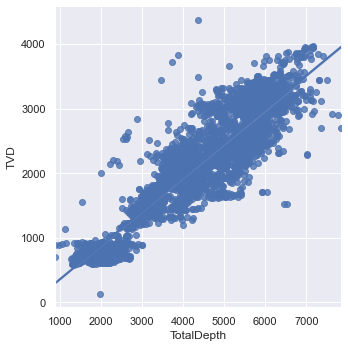

In [99]:
sns.set()
sns.lmplot( x="TotalDepth", y="TVD", data=well_header_clean, fit_reg=True, height= 5, legend=True);

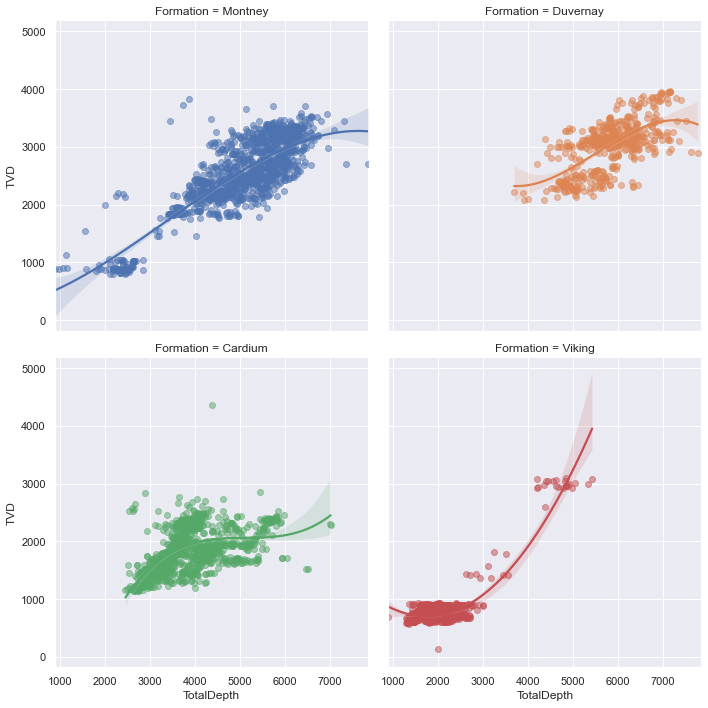

In [115]:
sns.set()
sns.lmplot( x="TotalDepth", y="TVD", data=well_header_clean, 
            fit_reg=True,hue='Formation',legend=False,col="Formation",col_wrap=2, height=5,order=3,
            scatter_kws={'alpha':0.5});

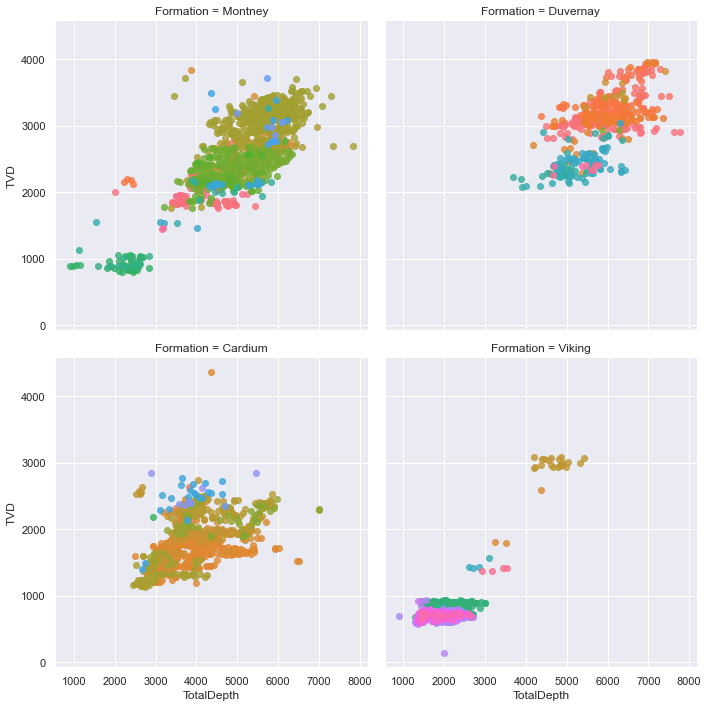

In [108]:
sns.set()
sns.lmplot( x="TotalDepth", y="TVD", data=well_header_clean, 
            fit_reg=False,hue='Field',legend=False,col="Formation",col_wrap=2, height=5);